<a href="https://colab.research.google.com/github/AMALA23ANN/Pandas/blob/master/freq_stopwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections


import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [90]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

text = ('Members of the public complained to the Classification Office about Paranormal Activity unrestricted rating. They felt that the film was very frightening and contained highly disturbing themes. One complainant said that her 13-year-old son was extremely disturbed after watching the film.As a result of the complaints, the Chief Censor decided to call the film in.')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
#Removing stopwords
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['Members', 'public', 'complained', 'Classification', 'Office', 'Paranormal', 'Activity', 'unrestricted', 'rating', '.', 'They', 'felt', 'film', 'frightening', 'contained', 'highly', 'disturbing', 'themes', '.', 'One', 'complainant', 'said', '13-year-old', 'extremely', 'disturbed', 'watching', 'film.As', 'result', 'complaints', ',', 'Chief', 'Censor', 'decided', 'call', 'film', '.']


In [92]:
#join the list of above words to create a sentence without stop words
filtered_sentence = (" ").join(tokens_without_sw)
print(filtered_sentence)

Members public complained Classification Office Paranormal Activity unrestricted rating . They felt film frightening contained highly disturbing themes . One complainant said 13-year-old extremely disturbed watching film.As result complaints , Chief Censor decided call film .


In [93]:
# List of all words across the text
all_words_no_urls = list(itertools.chain(*text))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[(' ', 54),
 ('e', 33),
 ('t', 32),
 ('i', 27),
 ('a', 23),
 ('n', 19),
 ('h', 17),
 ('r', 16),
 ('l', 16),
 ('s', 15),
 ('o', 14),
 ('f', 12),
 ('c', 12),
 ('d', 12),
 ('m', 10)]

In [94]:
clean_text_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_text_no_urls.head()

,words,count
0,,54
1,e,33
2,t,32
3,i,27
4,a,23


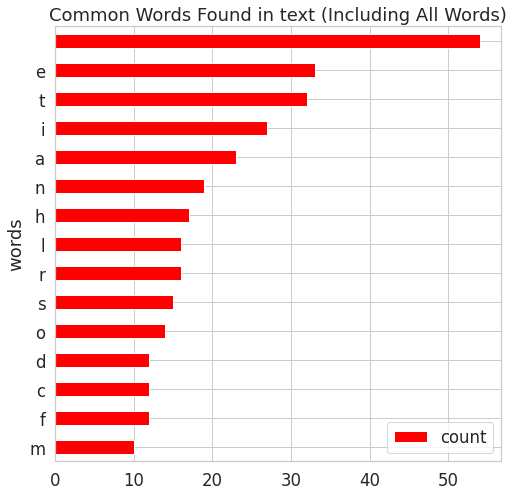

In [95]:
#Plotting the frequency of words

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_text_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in text (Including All Words)")

plt.show()


In [96]:
wordlist = text.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

print("String\n" + text +"\n")
print("List\n" + str(wordlist) + "\n")
print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

String
Members of the public complained to the Classification Office about Paranormal Activity unrestricted rating. They felt that the film was very frightening and contained highly disturbing themes. One complainant said that her 13-year-old son was extremely disturbed after watching the film.As a result of the complaints, the Chief Censor decided to call the film in.

List
['Members', 'of', 'the', 'public', 'complained', 'to', 'the', 'Classification', 'Office', 'about', 'Paranormal', 'Activity', 'unrestricted', 'rating.', 'They', 'felt', 'that', 'the', 'film', 'was', 'very', 'frightening', 'and', 'contained', 'highly', 'disturbing', 'themes.', 'One', 'complainant', 'said', 'that', 'her', '13-year-old', 'son', 'was', 'extremely', 'disturbed', 'after', 'watching', 'the', 'film.As', 'a', 'result', 'of', 'the', 'complaints,', 'the', 'Chief', 'Censor', 'decided', 'to', 'call', 'the', 'film', 'in.']

Frequencies
[1, 2, 7, 1, 1, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 2, 2, 1, 1, 1, 1, 1, 1,

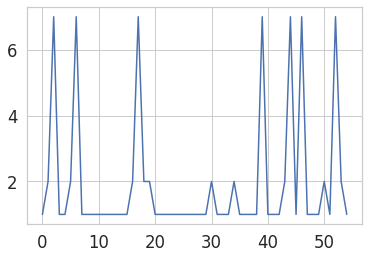

In [97]:
plt.plot(wordfreq)